In [15]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [60]:
data = load_boston()
X = data['data']
Y = data['target']

In [61]:
X = scale(X)

In [62]:
p_arr = np.linspace(1, 10, num=200)

In [56]:
len(Y)

506

In [49]:
cross_val = KFold(n_splits=5, shuffle=True, random_state=42)

In [50]:
acc_arr = pd.DataFrame(data=None, index=range(200), columns=['p', 'acc'])
#acc_arr.iloc[1] = [1, 2]
#acc_arr.head()

In [65]:
i = 0
for power in p_arr:
    knr = KNeighborsRegressor(metric='minkowski', n_neighbors=5, weights='distance', p=power)
    acc = cross_val_score(knr, X, Y, scoring='neg_mean_squared_error', cv=cross_val)
    acc_arr.iloc[i] = [power, np.mean(acc)]
    i += 1

In [66]:
acc_arr.head()

,p,acc
0,1,-16.0502
1,1.04523,-16.4041
2,1.09045,-16.3672
3,1.13568,-16.4425
4,1.1809,-16.4553


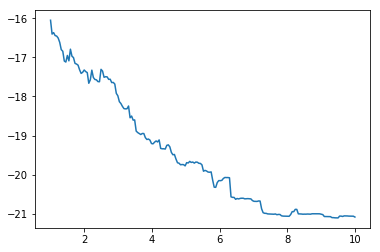

In [67]:
import matplotlib.pyplot as plt
plot(acc_arr['p'], acc_arr['acc'])
plt.show()

In [70]:
acc_arr[acc_arr['acc']==acc_arr['acc'].max()]

,p,acc
0,1,-16.0502
